In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
import cv2
from functions.functions import  find_correspondences , align_and_merge_images  , umeyama_alignment

In [15]:
img1 = cv2.imread('images/test_1_1.jpeg')
img2 = cv2.imread('images/test_1_2.jpeg')


In [16]:
data = find_correspondences(img1, img2)

In [17]:
print(data)

[{'img1_xy': array([1478.0625    , 1071.96850586]), 'img2_xy': array([ 853.99163818, 1095.85644531])}, {'img1_xy': array([1729.3828125 , 1077.44287109]), 'img2_xy': array([1316.3215332 , 1087.39611816])}, {'img1_xy': array([1723.51049805, 1078.53771973]), 'img2_xy': array([ 852.79730225, 1100.03686523])}, {'img1_xy': array([1856.16003418,  285.12002563]), 'img2_xy': array([1459.20007324,  370.80001831])}, {'img1_xy': array([112., 517.]), 'img2_xy': array([680.83209229, 203.90402222])}, {'img1_xy': array([ 803., 1035.]), 'img2_xy': array([ 400., 1083.])}, {'img1_xy': array([1848.00012207,  457.20001221]), 'img2_xy': array([1451.,  524.])}, {'img1_xy': array([1189.61633301, 1049.87231445]), 'img2_xy': array([1057.03869629, 1074.95458984])}, {'img1_xy': array([128., 215.]), 'img2_xy': array([1282.,  215.])}, {'img1_xy': array([1860.00012207,  424.80001831]), 'img2_xy': array([1460.,  496.])}, {'img1_xy': array([1344.96008301,  151.20001221]), 'img2_xy': array([1505.08813477,  366.33602905

In [18]:
src = np.array([item["img1_xy"] for item in data])  # transformed image
dst = np.array([item["img2_xy"] for item in data])  # original image

print("Source points:\n", src)
print("Destination points:\n", dst)

Source points:
 [[1478.0625     1071.96850586]
 [1729.3828125  1077.44287109]
 [1723.51049805 1078.53771973]
 [1856.16003418  285.12002563]
 [ 112.          517.        ]
 [ 803.         1035.        ]
 [1848.00012207  457.20001221]
 [1189.61633301 1049.87231445]
 [ 128.          215.        ]
 [1860.00012207  424.80001831]
 [1344.96008301  151.20001221]
 [1382.40014648  148.60801697]
 [1229.23034668 1072.46618652]
 [1346.          151.        ]
 [1013.         1090.        ]
 [1759.68005371 1041.11999512]
 [ 528.76806641  522.54730225]
 [1229.64501953 1072.0513916 ]
 [1856.40002441  284.40002441]
 [1720.80004883  303.6000061 ]
 [  87.6000061   910.80004883]
 [1555.20007324  329.76000977]
 [1854.14416504  285.12002563]
 [1759.20007324 1041.60009766]
 [1382.40002441  148.80000305]
 [1729.72814941 1080.00012207]
 [1383.09143066  149.29922485]
 [1767.70300293  301.58447266]
 [1868.40002441  283.20001221]
 [1480.80004883 1078.80004883]
 [ 144.          348.48001099]
 [1721.08813477  304.12

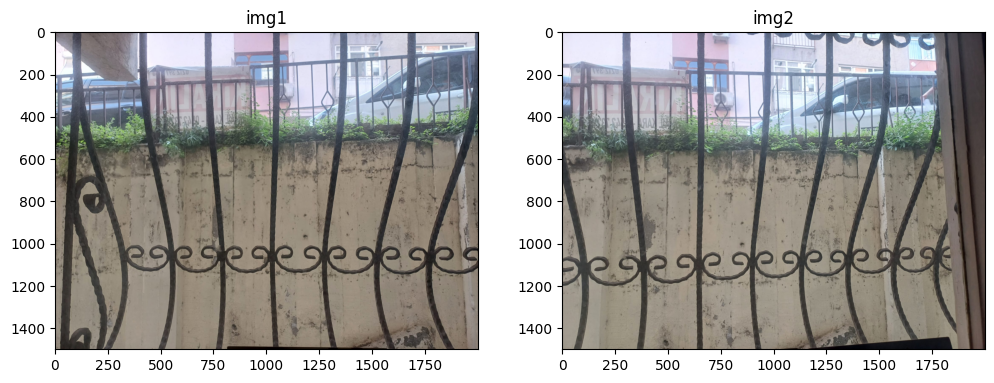

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("img1")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("img2")
plt.show()

In [20]:
R , t = umeyama_alignment(src , dst)
print("Rotation Matrix :\n" , R)
print("Transtion Matrix :\n" , t)

Rotation Matrix :
 [[ 0.92481976 -0.38040558]
 [ 0.38040558  0.92481976]]
Transtion Matrix :
 [ 135.25863488 -458.09571704]


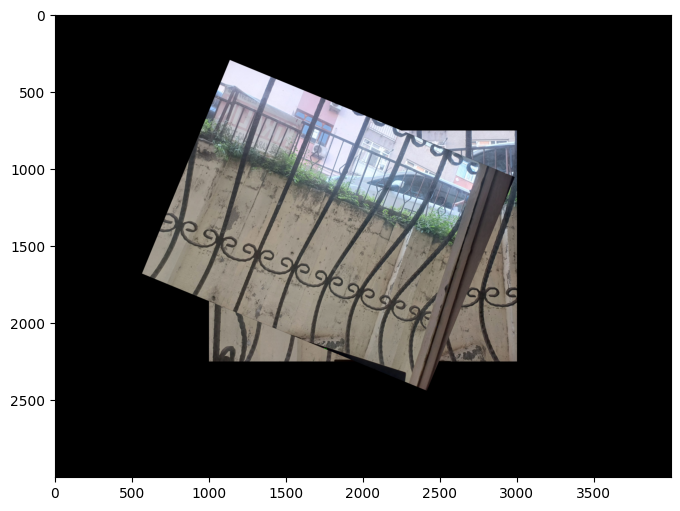

In [21]:
result = align_and_merge_images(img1, img2, src, dst)

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))